In [ ]:
import matplotlib
import networkx
import numpy as np
import sklearn
import scipy
import qutip

import dwave_networkx
import dimod
import minorminer
import qiskit
from qiskit import *
import qiskit.aqua

%matplotlib inline
from assignment_helper import get_amplitudes, get_counts

: 

# Oppgave 1

In [43]:
n_samples = 1000
p_1 = 0.3
x_data = np.random.binomial(1,p_1,n_samples)

In [44]:
assert isinstance(x_data, np.ndarray)
assert abs(p_1-x_data.sum()/n_samples) < 0.05

# Oppgave 2

In [45]:
def is_stochastic_vector(p):
    if p[0] < 0 or p[1] < 0:
        return False
    if np.linalg.norm(p, ord = 1) == 1:
        return True
    else:
        return False

In [46]:
assert not is_stochastic_vector(np.array([0.2, 0.3]))
assert not is_stochastic_vector(np.array([-0.2, 0.7]))
assert is_stochastic_vector(np.array([0.2, 0.8]))

# Oppgave 3

In [47]:
def project_to_first_basis_vector(p):
    M = np.array([[1,0],[0,0]])
    return p @ M

In [48]:
assert np.alltrue(project_to_first_basis_vector(np.array([0.2, 0.3])) == np.array([0.2, 0.]))
assert np.alltrue(project_to_first_basis_vector(np.array([1., 0.])) == np.array([1., 0.]))

# Oppgave 4

In [49]:
def apply_stochastic_matrix(p, M):
    """Apply the matrix M to the vector p, but only if
    p is a stochastic vector and M is a left stochastic
    matrix. Otherwise raise a ValueError.
    """
    if not is_stochastic_vector(p):
        raise ValueError
    for i in range(len(M)):
        if not M[0][i] + M[1][i] == 1:
            raise ValueError
    return M @ p

In [50]:
p = np.array([[.5], [.5]])
M = np.array([[0.7, 0.6], [0.3, 0.4]])
assert abs(np.linalg.norm(apply_stochastic_matrix(p, M), ord=1)-1) < 0.01
M = np.array([[0.7, 0.6], [0.3, 0.5]])
try:
    apply_stochastic_matrix(p, M)
except ValueError:
    pass
else:
    raise AssertionError("did not raise")

# Oppgave 5

In [51]:
M = np.array([[0.5,0.7],[0.5,0.3]])

In [52]:
assert np.allclose(M.dot(np.array([0.5, 0.5])), np.array([0.6, 0.4]))

# Oppgave 6

In [53]:
s = np.array([0.6,0.4])
p_0 = s[0]
p_1 = s[1]
H = -(p_0*np.log2(p_0) + p_1*np.log2(p_1))
print(H)

0.9709505944546686


# Oppgave 7

In [54]:
def is_quantum_state(psi):
    for i in range(len(psi)):
        if not psi[i] >= -1 and not psi[i] <= 1:
            return False
        if not np.around(np.linalg.norm(psi, ord = 2),2) == 1:
            return False
        
    return True
    
        

In [55]:
assert is_quantum_state(np.array([1/np.sqrt(2), 1/np.sqrt(2)]))
assert is_quantum_state(np.array([-1/np.sqrt(2), 1/np.sqrt(2)]))
assert is_quantum_state(np.array([-1/3, 2*np.sqrt(2)/3]))
assert is_quantum_state(np.array([-1j/3, 2*np.sqrt(2)/3]))
assert not is_quantum_state(np.array([0.2, 0.8]))

# Oppgave 8

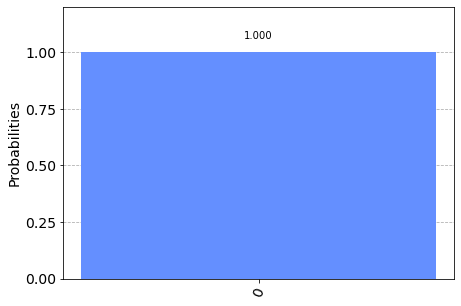

In [84]:
from qiskit import Aer, execute, QuantumCircuit
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

circuit = QuantumCircuit(1,1)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator,shots = 1024).result()
plot_histogram(result.get_counts())


In [86]:
amplitudes = get_amplitudes(circuit)
assert abs(amplitudes[0]-1.0) < 0.01

# Oppgave 9

In [81]:
circuit.h(0)
circuit.measure(0,0)

In [82]:
counts = get_counts(circuit)
assert abs(counts['0']/100-.5) < 0.2

# Oppgave 10

In [73]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.h(0)

In [74]:
amplitudes = get_amplitudes(circuit)
assert abs(amplitudes[1]+np.sqrt(2)/2) < 0.01

# Oppgave 11

In [62]:
def create_canonical_basis():
    zero_ket = np.array([1,0])
    one_ket = np.array([0,1])
    list = [np.kron(zero_ket,zero_ket),np.kron(zero_ket,one_ket),np.kron(one_ket,zero_ket),np.kron(one_ket,one_ket)]
    return list

In [63]:
basis = create_canonical_basis()
assert len(basis) == 4
if basis[0].shape != (4, ):
    basis = [basis_vector.reshape((4, )) for basis_vector in basis]

# Oppgave 12

In [68]:
statevector = Aer.get_backend('statevector_simulator')

circuit = QuantumCircuit(2,2)
circuit.x(0)
circuit.h(0)
circuit.cx(0,1)

#plot_bloch_multivector(execute(circuit,backend = statevector).result().get_statevector())

In [70]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(np.array([np.sqrt(2)/2, 0, 0, -np.sqrt(2)/2]), amplitudes)